# This notebook was a test of using SMOTE which didn't help anything

In [1]:
!pip install seaborn --upgrade
!pip install matplotlib --upgrade
!pip install pandas --upgrade
!pip install numpy --upgrade
!pip install sklearn --upgrade
!pip install keras --upgrade

Requirement already up-to-date: seaborn in /Users/calvintirrell/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages (0.10.1)
Requirement already up-to-date: matplotlib in /Users/calvintirrell/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages (3.2.1)
Requirement already up-to-date: pandas in /Users/calvintirrell/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages (1.0.3)
Requirement already up-to-date: numpy in /Users/calvintirrell/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages (1.18.3)
Requirement already up-to-date: sklearn in /Users/calvintirrell/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages (0.0)
Requirement already up-to-date: keras in /Users/calvintirrell/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages (2.3.1)


# Imports

In [2]:
import numpy as np
import pandas as pd;
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.over_sampling import SMOTE
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

/Users/calvintirrell/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/Users/calvintirrell/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


# Load data

In [3]:
data = pd.read_csv("../data/credit_approval.csv")

# Inspect data

In [4]:
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [5]:
data.shape

(690, 16)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      678 non-null    float64
 2   A3      690 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     677 non-null    float64
 14  A15     690 non-null    int64  
 15  class   690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


In [7]:
data.describe()

,A2,A3,A8,A11,A14,A15
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


# Data Cleaning and Processing

## Manage blank, null & nan values

In [8]:
# Replace (impute) missing values (in numerical columns) with mean value
data.fillna(data.mean(), inplace = True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    float64
 14  A15     690 non-null    int64  
 15  class   690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


## Rename Columns

In [10]:
data.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'class'],
      dtype='object')

In [11]:
data.rename(columns = {'A1':'Gender','A2':'Age','A3':'Debt',
                         'A4':'Married','A5':'BankClient',
                         'A6':'SchoolLevel','A7':'Ethnicity',
                        'A8':'YearsWorked','A9':'PriorDefault',
                         'A10':'Employed','A11':'CreditScore',
                         'A12':'DriversID','A13':'Citizen',
                        'A14':'ZipCode','A15':'Income','class':'Approval'
                        }, inplace = True)

In [12]:
data.columns

Index(['Gender', 'Age', 'Debt', 'Married', 'BankClient', 'SchoolLevel',
       'Ethnicity', 'YearsWorked', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversID', 'Citizen', 'ZipCode', 'Income', 'Approval'],
      dtype='object')

## Convert data to a useable format

In [13]:
data['Gender'].head()

0    b
1    a
2    a
3    b
4    b
Name: Gender, dtype: object

## For now just going to drop blank, null, nan values

In [14]:
data.dropna(inplace = True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 671 entries, 0 to 689
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Gender        671 non-null    object 
 1   Age           671 non-null    float64
 2   Debt          671 non-null    float64
 3   Married       671 non-null    object 
 4   BankClient    671 non-null    object 
 5   SchoolLevel   671 non-null    object 
 6   Ethnicity     671 non-null    object 
 7   YearsWorked   671 non-null    float64
 8   PriorDefault  671 non-null    object 
 9   Employed      671 non-null    object 
 10  CreditScore   671 non-null    int64  
 11  DriversID     671 non-null    object 
 12  Citizen       671 non-null    object 
 13  ZipCode       671 non-null    float64
 14  Income        671 non-null    int64  
 15  Approval      671 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 89.1+ KB


In [16]:
# 0 = Female, 1 = Male
data['Gender'] = data['Gender'].replace(['a','b'],[1,0]).apply(np.int64)
data['Gender'].head()

0    0
1    1
2    1
3    0
4    0
Name: Gender, dtype: int64

In [17]:
data.head()

,Gender,Age,Debt,Married,BankClient,SchoolLevel,Ethnicity,YearsWorked,PriorDefault,Employed,CreditScore,DriversID,Citizen,ZipCode,Income,Approval
0,0,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,1,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,1,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,0,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,0,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


## Age should be whole numbers, not decimals

In [18]:
data['Age'] = data['Age'].apply(np.int64)
data['Age'].head()

0    30
1    58
2    24
3    27
4    20
Name: Age, dtype: int64

## Values of 'u', 'y', 'l' aren't helpful - change with LabelEncoder()

In [19]:
data['Married'].value_counts()

u    510
y    159
l      2
Name: Married, dtype: int64

## Change 'Approval' column values (+/- aren't useful)

In [20]:
data['Approval'].head()

0    +
1    +
2    +
3    +
4    +
Name: Approval, dtype: object

In [21]:
# 0 = Not Approved, 1 = Approved
data['Approval'] = data['Approval'].replace(['+','-'],[1,0]).apply(np.int64)
print(data['Approval'].head())
print(data['Approval'].tail())

0    1
1    1
2    1
3    1
4    1
Name: Approval, dtype: int64
685    0
686    0
687    0
688    0
689    0
Name: Approval, dtype: int64


# Look into each column's specific data

In [22]:
# 'Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel',
# 'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
# 'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approval'

# for col in data.columns:
#     print(data[col].value_counts())
#     print()

## Change (encode) non-numerical values to numerical values

In [23]:
le = LabelEncoder()

for col in data:
    if data[col].dtypes == 'object':
        data[col] = le.fit_transform(data[col])

In [24]:
data.tail(10)

,Gender,Age,Debt,Married,BankClient,SchoolLevel,Ethnicity,YearsWorked,PriorDefault,Employed,CreditScore,DriversID,Citizen,ZipCode,Income,Approval
680,0,19,0.290,1,0,8,7,0.290,0,0,0,0,0,280.0,364,0
681,0,27,1.000,2,2,3,3,3.000,0,0,0,0,0,176.0,537,0
682,0,17,3.290,1,0,6,7,0.335,0,0,0,1,0,140.0,2,0
683,0,36,0.750,2,2,3,7,0.585,0,0,0,0,0,240.0,3,0
684,0,40,3.290,1,0,9,7,3.500,0,0,0,1,2,400.0,0,0
685,0,21,10.085,2,2,4,3,1.250,0,0,0,0,0,260.0,0,0
686,1,22,0.750,1,0,1,7,2.000,0,1,2,1,0,200.0,394,0
687,1,25,13.500,2,2,5,2,2.000,0,1,1,1,0,200.0,1,0
688,0,17,0.205,1,0,0,7,0.040,0,0,0,0,0,280.0,750,0
689,0,35,3.375,1,0,1,3,8.290,0,0,0,1,0,0.0,0,0


In [25]:
data2 = data.copy()

## Feature correlations

AxesSubplot(0.125,0.125;0.62x0.755)


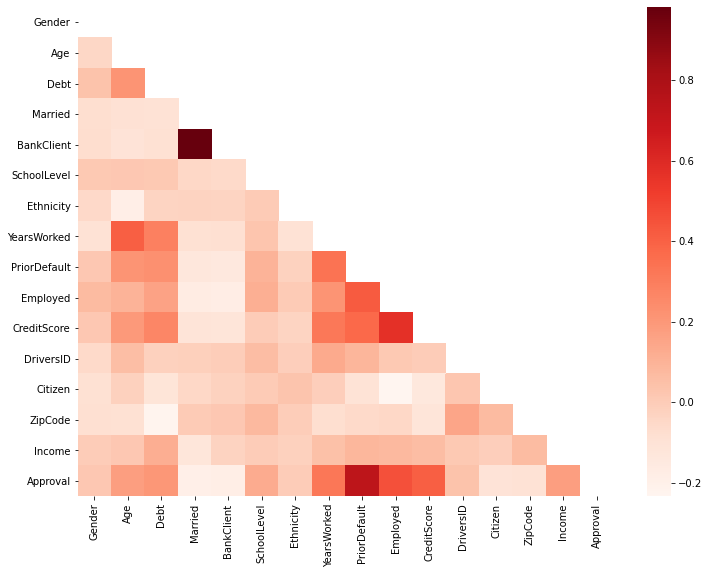

In [26]:
correlations = data.corr()
f, ax = plt.subplots(figsize = (12, 9))

mask = np.zeros_like(correlations, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

heatmap_one = sns.heatmap(correlations, cmap = 'Reds', mask = mask)
print(heatmap_one)

# Save visual as png file
# fig = heatmap_one.get_figure()
# fig.savefig("output.png")

## Subset of data with significant correlation

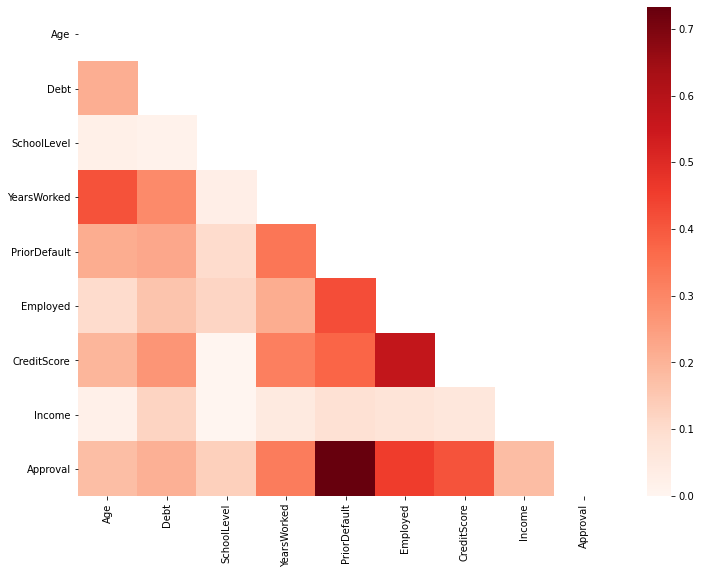

In [27]:
cols = ['Age', 'Debt', 'SchoolLevel', 'YearsWorked', 'PriorDefault',
        'Employed', 'CreditScore', 'Income', 'Approval']

sig_corr = data[cols].corr()
f, ax = plt.subplots(figsize = (12, 9))

mask = np.zeros_like(sig_corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(sig_corr, cmap = 'Reds', mask = mask)

## Subset of data with most significant correlation

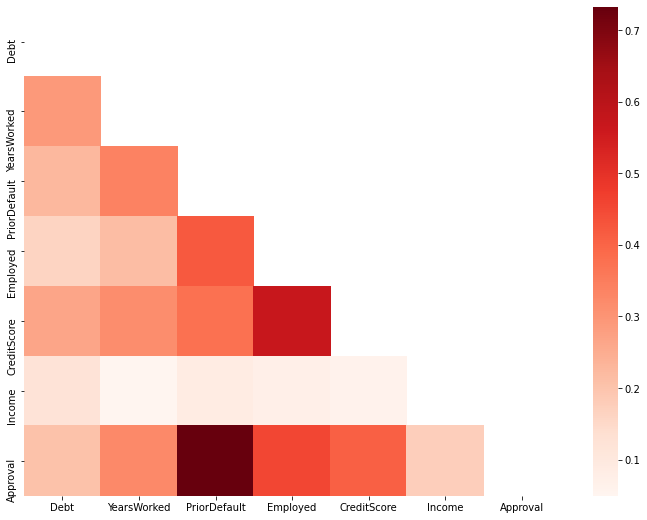

In [28]:
# These columns are my best guess at the most/best important
# features for credit card application approval
cols2 = ['Debt', 'YearsWorked', 'PriorDefault', 'Employed',
        'CreditScore', 'Income', 'Approval']

m_sig_corr = data[cols2].corr()
f, ax = plt.subplots(figsize = (12, 9))

mask = np.zeros_like(m_sig_corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(m_sig_corr, cmap ='Reds', mask = mask)

# Final subset of data pairplot

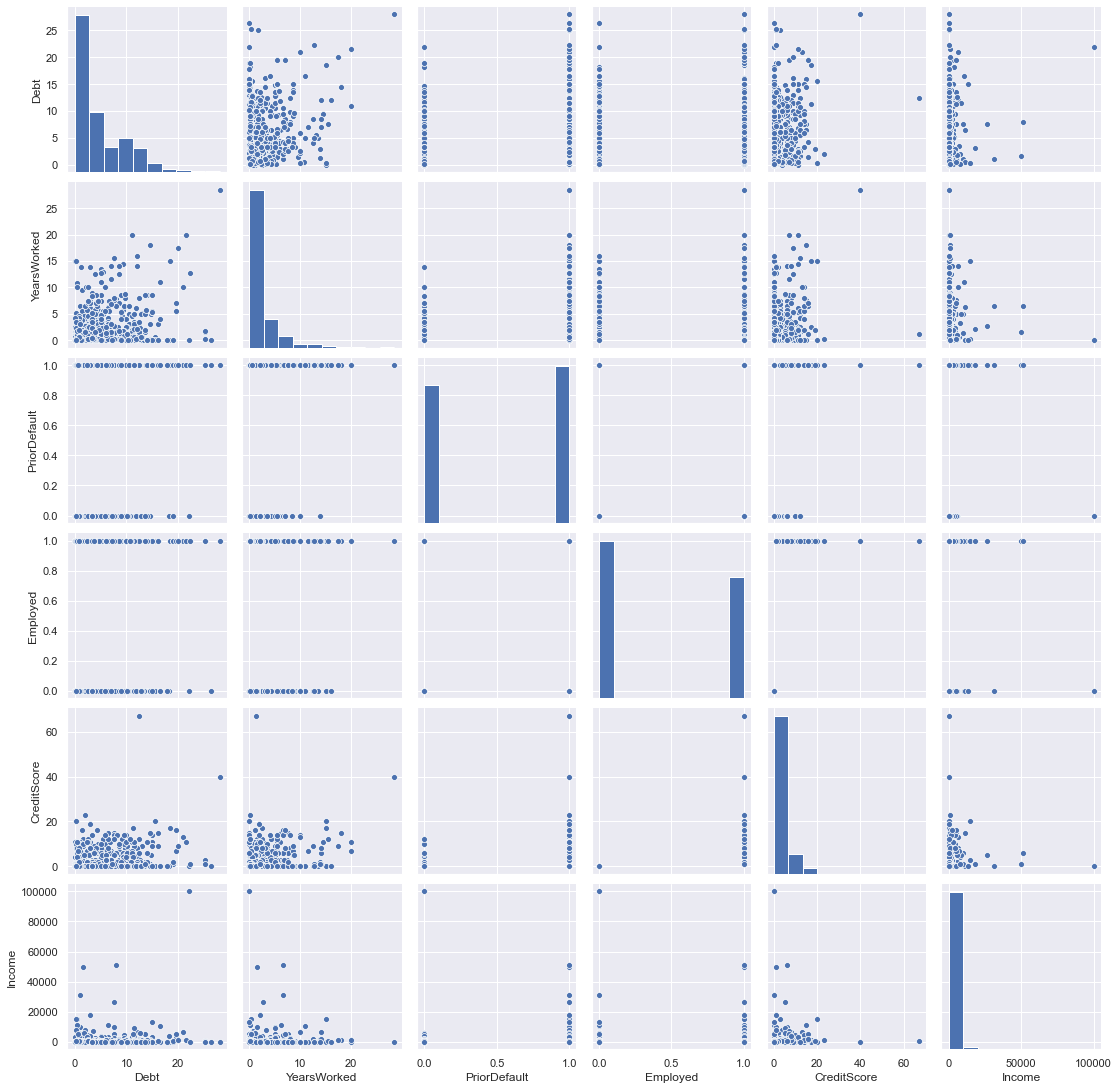

In [29]:
sns.set()
cols3 = ['Debt', 'YearsWorked', 'PriorDefault', 'Employed',
        'CreditScore', 'Income']
sns.pairplot(data[cols3])
plt.show()

## Data subset distributions

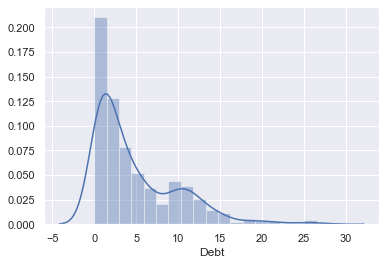

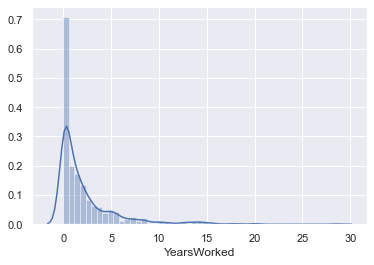

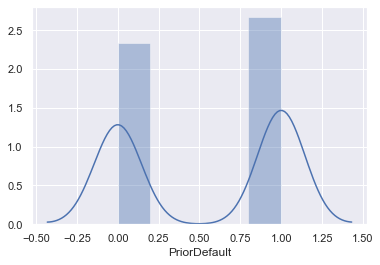

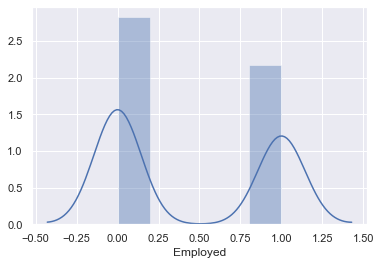

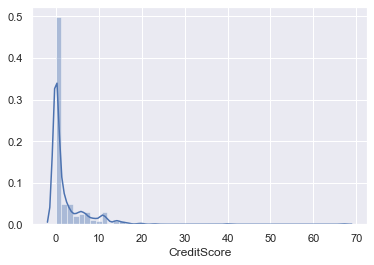

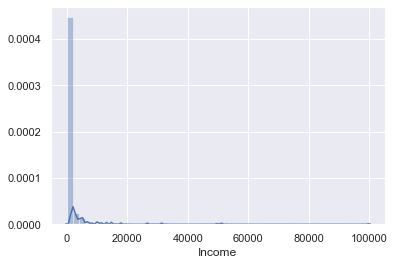

In [30]:
cols4 = ['Debt', 'YearsWorked', 'PriorDefault', 'Employed',
        'CreditScore', 'Income']

def plotDistPlot(col):
    sns.distplot(col)
    plt.show()
    
    
for col in cols4:
    plotDistPlot(data[col])

## Countplot of the 'Approval' column

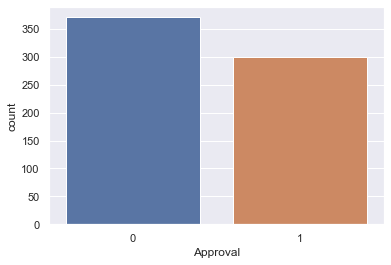

In [31]:
# 1 = Approved and 0 = Not Approved
sns.countplot(data = data, x = 'Approval')

# Train, Test, Split Before Modeling

In [32]:
# The first iterations of these models will include all columns except 'DriversLicense' and 'ZipCode'
# Later iterations of the models will have even fewer columns of data
# For the initial models, I will not be scaling the data until later iterations (if applicable)
data = data.drop(['DriversID', 'ZipCode'], axis = 1)

In [33]:
X = data.drop(columns = 'Approval', axis = 1)
y = data['Approval']
X2 = X.copy()
y2 = y.copy()
X3 = X.copy()
y3 = y.copy()

In [34]:
X_smote, y_smote = SMOTE().fit_sample(X3, y3)
X_balance = pd.DataFrame(X_smote, columns = X.columns)

In [35]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size = 0.3, random_state = 42)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [37]:
ss = StandardScaler()
X_train_scale = ss.fit_transform(X_train)
X_test_scale = ss.transform(X_test)

## Accuracy, confusion matrix, classification report function

In [38]:
def print_metrics(y_test_smote, y_pred):
    print('Accuracy Score is:', accuracy_score(y_test_smote, y_pred) * 100)
    print()
    print('Confusion matrix:')
    print(confusion_matrix(y_test_smote, y_pred))
    print()
    print('Classification report:')
    print(classification_report(y_test_smote, y_pred))

# First SMOTE Logistic Regression model

In [39]:
log_reg = LogisticRegression(random_state = 42, solver = 'liblinear').fit(X_train_smote, y_train_smote)
y_pred = log_reg.predict(X_test_smote)

print_metrics(y_test_smote, y_pred)

Accuracy Score is: 84.30493273542601

Confusion matrix:
[[89 26]
 [ 9 99]]

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.77      0.84       115
           1       0.79      0.92      0.85       108

    accuracy                           0.84       223
   macro avg       0.85      0.85      0.84       223
weighted avg       0.85      0.84      0.84       223



# First SMOTE Random Forest model

In [40]:
rf = RandomForestClassifier(random_state = 42, n_estimators = 100).fit(X_train_smote, y_train_smote)
y_pred = rf.predict(X_test_smote)

print_metrics(y_test_smote, y_pred)

Accuracy Score is: 83.40807174887892

Confusion matrix:
[[94 21]
 [16 92]]

Classification report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       115
           1       0.81      0.85      0.83       108

    accuracy                           0.83       223
   macro avg       0.83      0.83      0.83       223
weighted avg       0.83      0.83      0.83       223



## First SMOTE XGBoost model

In [41]:
xgb = XGBClassifier(random_state = 42).fit(X_train_smote, y_train_smote)
y_pred = xgb.predict(X_test_smote)

print_metrics(y_test_smote, y_pred)

Accuracy Score is: 81.16591928251121

Confusion matrix:
[[90 25]
 [17 91]]

Classification report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       115
           1       0.78      0.84      0.81       108

    accuracy                           0.81       223
   macro avg       0.81      0.81      0.81       223
weighted avg       0.81      0.81      0.81       223



## First SMOTE Ada Boost Classifier model

In [42]:
ada = AdaBoostClassifier(random_state = 42).fit(X_train_smote, y_train_smote)
y_pred = ada.predict(X_test_smote)

print_metrics(y_test_smote, y_pred)

Accuracy Score is: 82.95964125560538

Confusion matrix:
[[87 28]
 [10 98]]

Classification report:
              precision    recall  f1-score   support

           0       0.90      0.76      0.82       115
           1       0.78      0.91      0.84       108

    accuracy                           0.83       223
   macro avg       0.84      0.83      0.83       223
weighted avg       0.84      0.83      0.83       223



## First SMOTE Gradient Boost model

In [43]:
gbc = GradientBoostingClassifier(random_state = 42).fit(X_train_smote, y_train_smote)
y_pred = gbc.predict(X_test_smote)

print_metrics(y_test_smote, y_pred)

Accuracy Score is: 82.51121076233184

Confusion matrix:
[[91 24]
 [15 93]]

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.79      0.82       115
           1       0.79      0.86      0.83       108

    accuracy                           0.83       223
   macro avg       0.83      0.83      0.83       223
weighted avg       0.83      0.83      0.83       223



## Feature Importances with Chi-Squared

In [44]:
# Apply SelectKBest class to extract all feature importances (k='all')
top_features = SelectKBest(score_func = chi2, k = 'all')
top_features.fit(X3, y3)
scores = pd.DataFrame(top_features.scores_)
columns = pd.DataFrame(X3.columns)

# Concat two df for better visualization 
top_scores = pd.concat([columns, scores], axis = 1)
top_scores.columns = ['Feature Name', 'Score']
print(top_scores.nlargest(13, 'Score'))

    Feature Name          Score
12        Income  563411.147139
10   CreditScore    1103.833737
7    YearsWorked     356.027429
8   PriorDefault     168.020391
2           Debt     146.905936
1            Age      92.582490
9       Employed      78.862259
5    SchoolLevel      37.030664
4     BankClient      32.971019
11       Citizen      13.141317
3        Married       3.612912
0         Gender       0.175559
6      Ethnicity       0.007666


## Logistic Regression Feature Importance

Feature: Gender, Score: 0.05511
Feature: Age, Score: -0.01272
Feature: Debt, Score: -0.02141
Feature: Married, Score: -1.45723
Feature: BankClient, Score: 0.36993
Feature: SchoolLevel, Score: 0.04645
Feature: Ethnicity, Score: 0.01330
Feature: YearsWorked, Score: 0.16753
Feature: PriorDefault, Score: 3.49210
Feature: Employed, Score: 0.19493
Feature: CreditScore, Score: 0.15436
Feature: DriversID, Score: 0.11242
Feature: Citizen, Score: 0.00050


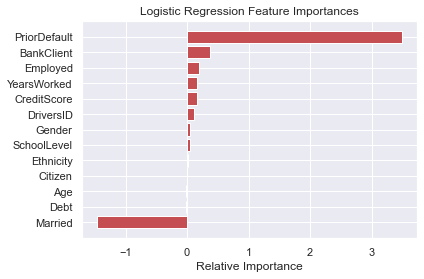

In [45]:
importance = log_reg.coef_[0]
cols = data2.columns
indices = np.argsort(importance)

# Uncomment all lines below here to see outputs

for i, v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (cols[i], v))
    
plt.title('Logistic Regression Feature Importances')
plt.barh(range(len(indices)), importance[indices], color = 'r', align = 'center')
plt.yticks(range(len(indices)), [cols[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Feature: Gender, Score: 0.05511
Feature: Age, Score: -0.01272
Feature: Debt, Score: -0.02141
Feature: Married, Score: -1.45723
Feature: BankClient, Score: 0.36993
Feature: SchoolLevel, Score: 0.04645
Feature: Ethnicity, Score: 0.01330
Feature: YearsWorked, Score: 0.16753
Feature: PriorDefault, Score: 3.49210
Feature: Employed, Score: 0.19493
Feature: CreditScore, Score: 0.15436
Feature: Citizen, Score: 0.11242
Feature: Income, Score: 0.00050


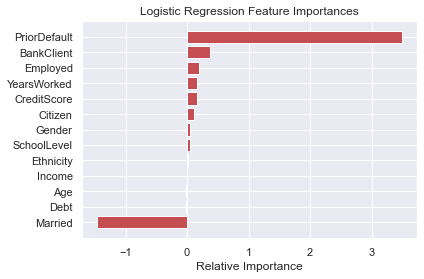

In [46]:
importance = log_reg.coef_[0]
cols = data.columns
indices = np.argsort(importance)

# Uncomment all lines below here to see outputs

for i, v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (cols[i], v))
    
plt.title('Logistic Regression Feature Importances')
plt.barh(range(len(indices)), importance[indices], color = 'r', align = 'center')
plt.yticks(range(len(indices)), [cols[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Function to visualize 4 different models' feature importances

In [47]:
def feature_imp_viz(model):
    features = data2.columns
    importances = model.feature_importances_
    indices = np.argsort(importances)
    
    model_name = 'model_name'
    
    if model == rf:
        model_name = 'Random Forest'
    elif model == xgb:
        model_name = 'XG Boost'
    elif model == ada:
        model_name = 'Ada Boost'
    else:
        model_name = 'Gradient Boost'
    
    print('*' * 60)
    
    for i, v in enumerate(importances):
        print('Feature: %s, Score: %.5f' % (features[i], v))
    
    plt.title(model_name + ' Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color = 'r', align = 'center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

## Visualize 4 different models' feature importances

************************************************************
Feature: Gender, Score: 0.01055
Feature: Age, Score: 0.06335
Feature: Debt, Score: 0.08268
Feature: Married, Score: 0.01930
Feature: BankClient, Score: 0.01966
Feature: SchoolLevel, Score: 0.05666
Feature: Ethnicity, Score: 0.02800
Feature: YearsWorked, Score: 0.13142
Feature: PriorDefault, Score: 0.34457
Feature: Employed, Score: 0.05310
Feature: CreditScore, Score: 0.11895
Feature: DriversID, Score: 0.00697
Feature: Citizen, Score: 0.06479


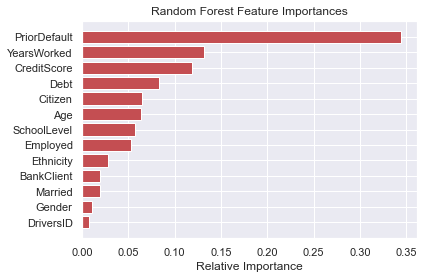

************************************************************
Feature: Gender, Score: 0.01653
Feature: Age, Score: 0.01896
Feature: Debt, Score: 0.01904
Feature: Married, Score: 0.04958
Feature: BankClient, Score: 0.00706
Feature: SchoolLevel, Score: 0.02489
Feature: Ethnicity, Score: 0.01995
Feature: YearsWorked, Score: 0.02601
Feature: PriorDefault, Score: 0.60130
Feature: Employed, Score: 0.13975
Feature: CreditScore, Score: 0.04110
Feature: DriversID, Score: 0.00000
Feature: Citizen, Score: 0.03584


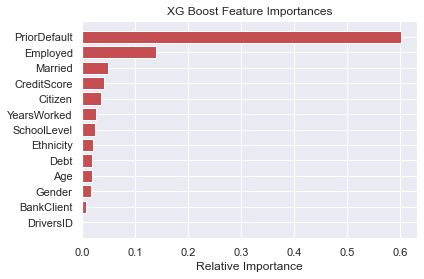

************************************************************
Feature: Gender, Score: 0.00000
Feature: Age, Score: 0.16000
Feature: Debt, Score: 0.12000
Feature: Married, Score: 0.02000
Feature: BankClient, Score: 0.02000
Feature: SchoolLevel, Score: 0.12000
Feature: Ethnicity, Score: 0.02000
Feature: YearsWorked, Score: 0.24000
Feature: PriorDefault, Score: 0.06000
Feature: Employed, Score: 0.00000
Feature: CreditScore, Score: 0.12000
Feature: DriversID, Score: 0.00000
Feature: Citizen, Score: 0.12000


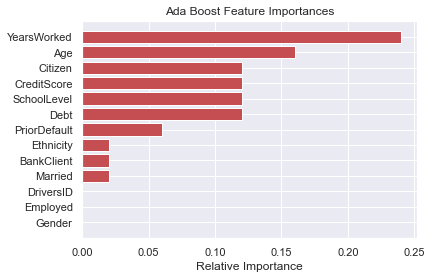

************************************************************
Feature: Gender, Score: 0.00019
Feature: Age, Score: 0.02221
Feature: Debt, Score: 0.04344
Feature: Married, Score: 0.01316
Feature: BankClient, Score: 0.01913
Feature: SchoolLevel, Score: 0.03901
Feature: Ethnicity, Score: 0.01917
Feature: YearsWorked, Score: 0.03896
Feature: PriorDefault, Score: 0.72441
Feature: Employed, Score: 0.01162
Feature: CreditScore, Score: 0.03248
Feature: DriversID, Score: 0.00040
Feature: Citizen, Score: 0.03582


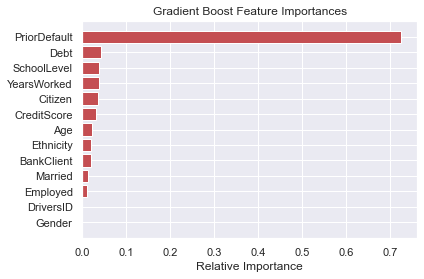

In [48]:
# Uncomment 3 lines below to see 4 visuals

models = [rf, xgb, ada, gbc]
for model in models:
    feature_imp_viz(model)

## Round 2 of model testing (non-scaled SMOTE data, default settings)

In [49]:
classifiers = [LogisticRegression(random_state = 42, solver = 'liblinear'),
               RandomForestClassifier(random_state = 42, n_estimators = 100),
               XGBClassifier(random_state = 42),
               AdaBoostClassifier(random_state = 42),
               GradientBoostingClassifier(random_state = 42)]

for clfs in classifiers:
    clfs.fit(X_train_smote, y_train_smote)
    name = clfs.__class__.__name__
    scale_predict = clfs.predict(X_test_smote)
    print("=" * 60)
    print(name)
    print()
    print('Accuracy Score:', accuracy_score(y_test_smote, scale_predict) * 100)
    print()
    print('Confusion matrix:')
    print(confusion_matrix(y_test_smote, scale_predict))
    print()
    print('Classification report:')
    print(classification_report(y_test_smote, scale_predict))

LogisticRegression

Accuracy Score: 84.30493273542601

Confusion matrix:
[[89 26]
 [ 9 99]]

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.77      0.84       115
           1       0.79      0.92      0.85       108

    accuracy                           0.84       223
   macro avg       0.85      0.85      0.84       223
weighted avg       0.85      0.84      0.84       223

RandomForestClassifier

Accuracy Score: 83.40807174887892

Confusion matrix:
[[94 21]
 [16 92]]

Classification report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       115
           1       0.81      0.85      0.83       108

    accuracy                           0.83       223
   macro avg       0.83      0.83      0.83       223
weighted avg       0.83      0.83      0.83       223

XGBClassifier

Accuracy Score: 81.16591928251121

Confusion matrix:
[[90 25]
 [17 91]]

Classification report:

## Round 3 of testing (GridSearch, only 2 models, cross validation 5, non-scaled data)

In [50]:
classifier = [LogisticRegression(n_jobs = -1), RandomForestClassifier(n_jobs = -1)]

log_reg_grid = {
    'random_state' : [42],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter' : [50, 75, 100, 125, 150],
    'multi_class' : ['auto']
}

rfc_grid = {
    'n_estimators' : [50, 75, 100, 125, 150],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [None, 25, 50, 75, 100],
    'min_samples_split' : [2, 4, 6, 8, 10],
    'random_state' : [42]
}

param_grid_list = [log_reg_grid, rfc_grid]

i = 0
for clf in classifier:

    gscv = GridSearchCV(estimator = clf, param_grid = param_grid_list[i], cv = 5)
    gscv.fit(X_train_smote, y_train_smote)
    i += 1

    print('Model name:', clf.__class__.__name__)
    print()
    print('Best params:', gscv.best_params_)
    print()
    y_pred = gscv.predict(X_test_smote)
    print('5 Cross Validation Score:', gscv.score(X_train_smote, y_train_smote) * 100)
    print()
    print('Prediction:')
    print(y_pred)
    print()
    print('Accuracy Score:', accuracy_score(y_test_smote, y_pred) * 100)
    print()
    print('Confusion matrix:')
    print(confusion_matrix(y_test_smote, y_pred))
    print()
    print('Classification report:')
    print(classification_report(y_test_smote, y_pred))
    print('=' * 120)

Model name: LogisticRegression

Best params: {'max_iter': 50, 'multi_class': 'auto', 'random_state': 42, 'solver': 'liblinear'}

5 Cross Validation Score: 89.21001926782274

Prediction:
[1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0
 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1
 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1
 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1
 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0
 1]

Accuracy Score: 84.30493273542601

Confusion matrix:
[[89 26]
 [ 9 99]]

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.77      0.84       115
           1       0.79      0.92      0.85       108

    accuracy                           0.84       223
   macro avg       0.85      0.85      0.84  

In [51]:
classifier = [LogisticRegression(n_jobs = -1), RandomForestClassifier(n_jobs = -1)]

log_reg_grid = {
    'random_state' : [42],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter' : [50, 75, 100, 125, 150],
    'multi_class' : ['auto']
}

rfc_grid = {
    'n_estimators' : [50, 75, 100, 125, 150],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [None, 25, 50, 75, 100],
    'min_samples_split' : [2, 4, 6, 8, 10],
    'random_state' : [42]
}

param_grid_list = [log_reg_grid, rfc_grid]

i = 0
for clf in classifier:

    gscv = GridSearchCV(estimator = clf, param_grid = param_grid_list[i], cv = 10)
    gscv.fit(X_train_smote, y_train_smote)
    i += 1

    print('Model name:', clf.__class__.__name__)
    print()
    print('Best params:', gscv.best_params_)
    print()
    y_pred = gscv.predict(X_test_smote)
    print('10 Cross Validation Score:', gscv.score(X_train_smote, y_train_smote) * 100)
    print()
    print('Prediction:')
    print(y_pred)
    print()
    print('Accuracy Score:', accuracy_score(y_test_smote, y_pred) * 100)
    print()
    print('Confusion matrix:')
    print(confusion_matrix(y_test_smote, y_pred))
    print()
    print('Classification report:')
    print(classification_report(y_test_smote, y_pred))
    print('=' * 120)

Model name: LogisticRegression

Best params: {'max_iter': 50, 'multi_class': 'auto', 'random_state': 42, 'solver': 'liblinear'}

10 Cross Validation Score: 89.21001926782274

Prediction:
[1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0
 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1
 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1
 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1
 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0
 1]

Accuracy Score: 84.30493273542601

Confusion matrix:
[[89 26]
 [ 9 99]]

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.77      0.84       115
           1       0.79      0.92      0.85       108

    accuracy                           0.84       223
   macro avg       0.85      0.85      0.84 

In [52]:
classifier = [LogisticRegression(n_jobs = -1), RandomForestClassifier(n_jobs = -1)]

log_reg_grid = {
    'random_state' : [42],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter' : [50, 75, 100, 125, 150],
    'multi_class' : ['auto']
}

rfc_grid = {
    'n_estimators' : [50, 75, 100, 125, 150],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [None, 25, 50, 75, 100],
    'min_samples_split' : [2, 4, 6, 8, 10],
    'random_state' : [42]
}

param_grid_list = [log_reg_grid, rfc_grid]

i = 0
for clf in classifier:

    gscv = GridSearchCV(estimator = clf, param_grid = param_grid_list[i], cv = 15)
    gscv.fit(X_train_smote, y_train_smote)
    i += 1

    print('Model name:', clf.__class__.__name__)
    print()
    print('Best params:', gscv.best_params_)
    print()
    y_pred = gscv.predict(X_test_smote)
    print('15 Cross Validation Score:', gscv.score(X_train_smote, y_train_smote) * 100)
    print()
    print('Prediction:')
    print(y_pred)
    print()
    print('Accuracy Score:', accuracy_score(y_test_smote, y_pred) * 100)
    print()
    print('Confusion matrix:')
    print(confusion_matrix(y_test_smote, y_pred))
    print()
    print('Classification report:')
    print(classification_report(y_test_smote, y_pred))
    print('=' * 120)

Model name: LogisticRegression

Best params: {'max_iter': 50, 'multi_class': 'auto', 'random_state': 42, 'solver': 'liblinear'}

15 Cross Validation Score: 89.21001926782274

Prediction:
[1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0
 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1
 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1
 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1
 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0
 1]

Accuracy Score: 84.30493273542601

Confusion matrix:
[[89 26]
 [ 9 99]]

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.77      0.84       115
           1       0.79      0.92      0.85       108

    accuracy                           0.84       223
   macro avg       0.85      0.85      0.84 

In [53]:
classifier = [LogisticRegression(n_jobs = -1), RandomForestClassifier(n_jobs = -1)]

log_reg_grid = {
    'random_state' : [42],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter' : [50, 75, 100, 125, 150],
    'multi_class' : ['auto']
}

rfc_grid = {
    'n_estimators' : [50, 75, 100, 125, 150],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [None, 25, 50, 75, 100],
    'min_samples_split' : [2, 4, 6, 8, 10],
    'random_state' : [42]
}

param_grid_list = [log_reg_grid, rfc_grid]

i = 0
for clf in classifier:

    gscv = GridSearchCV(estimator = clf, param_grid = param_grid_list[i], cv = 20)
    gscv.fit(X_train_smote, y_train_smote)
    i += 1

    print('Model name:', clf.__class__.__name__)
    print()
    print('Best params:', gscv.best_params_)
    print()
    y_pred = gscv.predict(X_test_smote)
    print('20 Cross Validation Score:', gscv.score(X_train_smote, y_train_smote) * 100)
    print()
    print('Prediction:')
    print(y_pred)
    print()
    print('Accuracy Score:', accuracy_score(y_test_smote, y_pred) * 100)
    print()
    print('Confusion matrix:')
    print(confusion_matrix(y_test_smote, y_pred))
    print()
    print('Classification report:')
    print(classification_report(y_test_smote, y_pred))
    print('=' * 120)

Model name: LogisticRegression

Best params: {'max_iter': 50, 'multi_class': 'auto', 'random_state': 42, 'solver': 'liblinear'}

20 Cross Validation Score: 89.21001926782274

Prediction:
[1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0
 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1
 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1
 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1
 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0
 1]

Accuracy Score: 84.30493273542601

Confusion matrix:
[[89 26]
 [ 9 99]]

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.77      0.84       115
           1       0.79      0.92      0.85       108

    accuracy                           0.84       223
   macro avg       0.85      0.85      0.84 